<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
#uncomment the following code if seaborn.histplot doesn't work properly. Then restart the kernel.
#!pip install -U seaborn

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# 1) Provide a boxplot for the "Median value of owner-occupied homes"


Text(0.5, 1.0, 'Boxplot of Median value of owner-occupied homes')

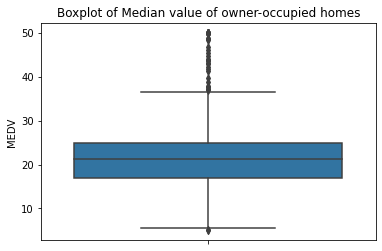

In [3]:
M_box = sns.boxplot(y='MEDV', data = boston_df)
M_box.set_title("Boxplot of Median value of owner-occupied homes")

### We can see that the variable MEDV is centered around the value 21, and a lot of data points suround it in the range 18-25. Wich means that we can suppose that the varaible is normally distributed.

# 2) Provide a  histogram for the Charles river variable

Text(0.5, 0.98, 'Histogram of Charles river variable')

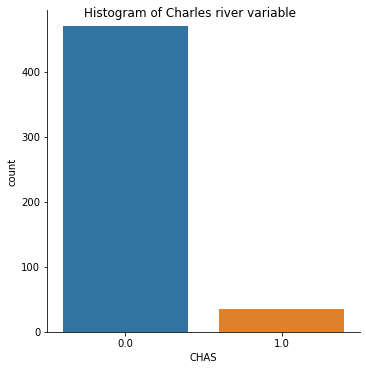

In [5]:
CHAS_hist = sns.catplot(x='CHAS', data=boston_df, kind='count')
CHAS_hist.fig.suptitle("Histogram of Charles river variable")

In [6]:
print('Total number of CHAS = 0 is:',len(boston_df[boston_df["CHAS"] == 0]),'Total number of CHAS = 1 is:', len(boston_df[boston_df["CHAS"] == 1]))

Total number of CHAS = 0 is: 471 Total number of CHAS = 1 is: 35


### We know that the variable CHAS was encoded so that 1 if tract bounds river and 0 otherwise. from the histogram we notice that only 35 houses are locted near a river while a total of 471 houses are not.

# 3) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [8]:
boston_df.loc[(boston_df['AGE']<=35), 'Age_group']='35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'Age_group']='Between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70) ,'Age_group']='70 years and older'

Text(0.5, 1.0, 'Boxplot of Median value of owner-occupied homes Vs Age_Group')

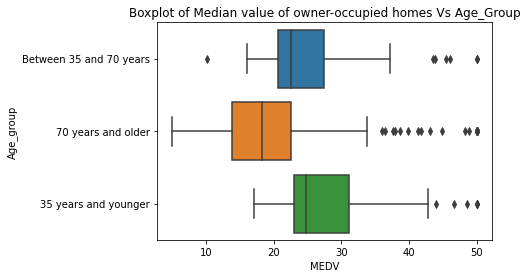

In [9]:
MEDV_vs_Age = sns.boxplot(x='MEDV',y = 'Age_group', data=boston_df)
MEDV_vs_Age.set_title("Boxplot of Median value of owner-occupied homes Vs Age_Group")

### We can see that as long as the AGE is greater the less the Median value of owner-occupied homes.

# 4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Scatterplot of NOX by INDUS')

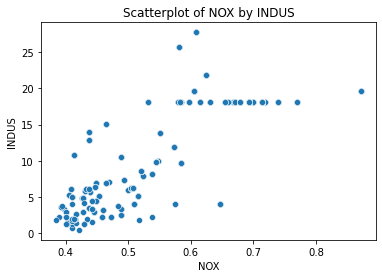

In [11]:
A = sns.scatterplot(x='NOX', y='INDUS', data = boston_df)
A.set_title("Scatterplot of NOX by INDUS")

### We can see that there is a clear positive upward slopping curve meaning that the NOX - nitric oxides concentration is positively correlated with INDUS - proportion of non-retail business acres per town

# 5) Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram of pupil to teacher ratio variable')

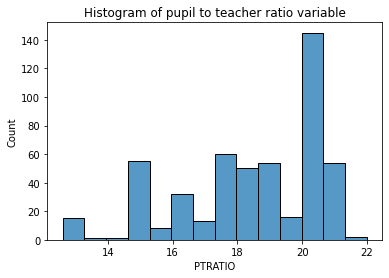

In [23]:
sns.histplot(data=boston_df, x='PTRATIO').set_title('Histogram of pupil to teacher ratio variable')

### We see that the PTRATIO doesn't follow a specific pattern while most of the data is condensed around the walue 20

# 6) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### First of all we will check whether the variances are equal

### State the hypothesis

$H_0:µ_1=µ_2$ ("there is no difference in the variance of Median value of owner-occupied homes between houses close to the river and other houses")

$H_1:µ_1≠µ_2$ ("there is a difference in the variance of Median value of owner-occupied homes between houses close to the river and other houses")

In [16]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

### Since the p-value is less than 0.05, we reject the null hypothesis, this means that there is not enough evidence that the variances are equal. As a result, we will set the parameter equal_val to False


### State the hypothesis

$H_0:µ_1=µ_2$ ("there is no difference in Median value of owner-occupied homes between houses close to the river and other houses")

$H_1:µ_1≠µ_2$ ("there is a difference in Median value of owner-occupied homes between houses close to the river and other houses")

In [17]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

### Since the p-value is less than 0.05 we reject the null hypothesis, which means that there is no evidence that the means are equal

# 7) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ

In [19]:
below_35 = boston_df[boston_df['Age_group']=='35 years and younger']['MEDV']
between_35_70 = boston_df[boston_df['Age_group']=='Between 35 and 70 years']['MEDV']
above_70 = boston_df[boston_df['Age_group']=='70 years and older']['MEDV']

In [20]:
f_stat, p_val = scipy.stats.f_oneway(below_35, between_35_70, above_70)
print("f_statistic is: {0} and p_value is: {1}".format(f_stat, p_val))

f_statistic is: 36.40764999196599 and p_value is: 1.7105011022702984e-15


### At the level of confidence of 5%, we reject the null hypothesis as there is statistical evidence that at least one mean differ from the other means

# 8) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [21]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['ZN'])

(-0.5166037078279845, 7.231578218087849e-36)

### A coefficient equal to -0.51 means that the variables (NOX) and (ZN) are negatively correlated 

# 9) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [22]:
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.21e-08
Time:                        18:48:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The model established by the regression analysis is MEDV = 1.0916*DIS + 18.3901 meaning that an additional unit of weighted distances to five Boston employment centres would result in the rise of Median value of owner-occupied homes with 1.0916